In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from IPython.display import Image

In [10]:
CMS_Data = pd.read_csv('hgcal.csv')
CMS_Data_Numpy = CMS_Data.to_numpy()
# print(CMS_Data_Numpy)

In [11]:
CMS_Data_Numpy_sub = np.delete(CMS_Data_Numpy, 0, axis=1)
# print(CMS_Data_Numpy_sub)

In [12]:
def scale_data(arr):
    
    CMS_Data_Numpy_sub_Means = np.mean(arr, axis=0)
    # print(CMS_Data_Numpy_sub_Means)
    CMS_Data_Numpy_sub_STDs = np.std(arr, axis=0)
    # print(CMS_Data_Numpy_sub_STDs)
    arr = (arr-CMS_Data_Numpy_sub_Means)/CMS_Data_Numpy_sub_STDs
    # print (arr)
    return arr
    
    return scale_data

In [13]:
CMS_Data_Numpy_sub_scaled=scale_data(CMS_Data_Numpy_sub)
# print(CMS_Data_Numpy_sub_scaled)

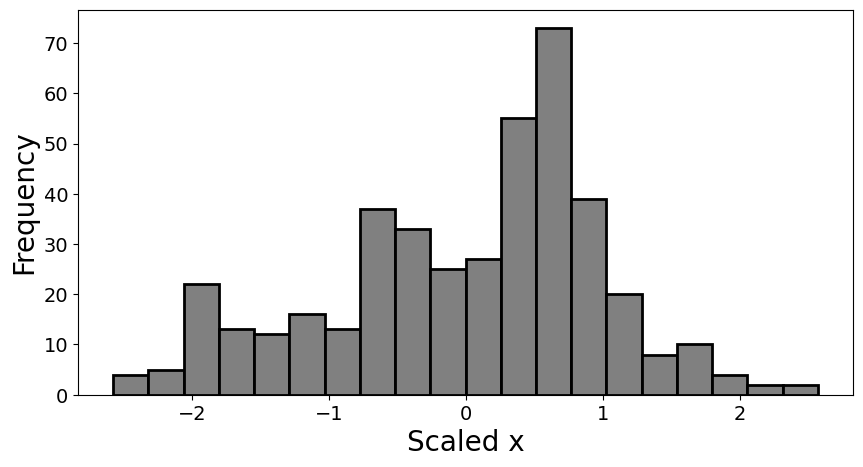

In [20]:
plt.figure(figsize = (10, 5))

plt.hist(CMS_Data_Numpy_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Scaled x', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)

plt.show()

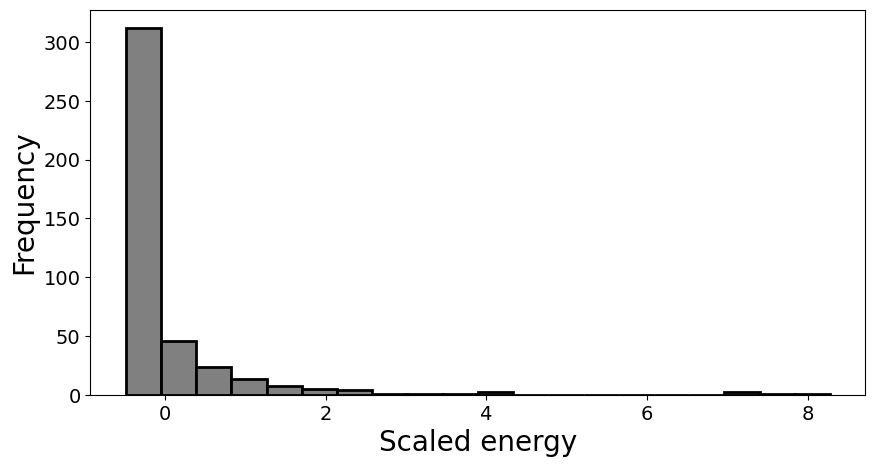

In [21]:
plt.figure(figsize = (10, 5))

plt.hist(CMS_Data_Numpy_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Scaled energy', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)

plt.show()

In [29]:
def split_data(arr, split_proportions, axis):

    num_cols = arr.shape[axis]
    split_data_array = []
    j = 0
    for i in split_proportions:
        split_data_array.append(arr.take(indices = range(int(j), int(j+num_cols*i)), axis = axis))
        j = j+num_cols*i
    
    return split_data_array

In [31]:
sub_data_list_1 = split_data(arr = CMS_Data_Numpy_sub_scaled, split_proportions = [0.6, 0.2, 0.2], axis = 0)

In [33]:
print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

(252, 7) (84, 7) (84, 7)


In [35]:
sub_data_list_2 = split_data(arr = CMS_Data_Numpy_sub_scaled, split_proportions = [0.5, 0.5], axis = 1)

In [37]:
print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(420, 3) (420, 4)
